In [44]:
import matplotlib.pyplot as plt
import math
import numpy
import statistics 

def draw_my_function(f,start,end,number_of_points):
    x_values = numpy.linspace(start,end,number_of_points)
    y_values = f(x_values)
    
    plt.figure(figsize=(15,5))
    plt.plot(x_values,y_values)
    plt.show()
    
def draw_my_function_with_gradient(f,start,end,number_of_points):
    x_values = numpy.linspace(start,end,number_of_points)
    y_values = f(x_values)
    df_dx_values = numpy.gradient(y_values,x_values)
    
    plt.figure(figsize=(15,5)) 
    plt.plot(x_values,y_values)
    plt.plot(x_values,df_dx_values)
    plt.show()
    
f = lambda x_values : numpy.exp(-(x_values/10))*numpy.sin(x_values)

## Question 1)

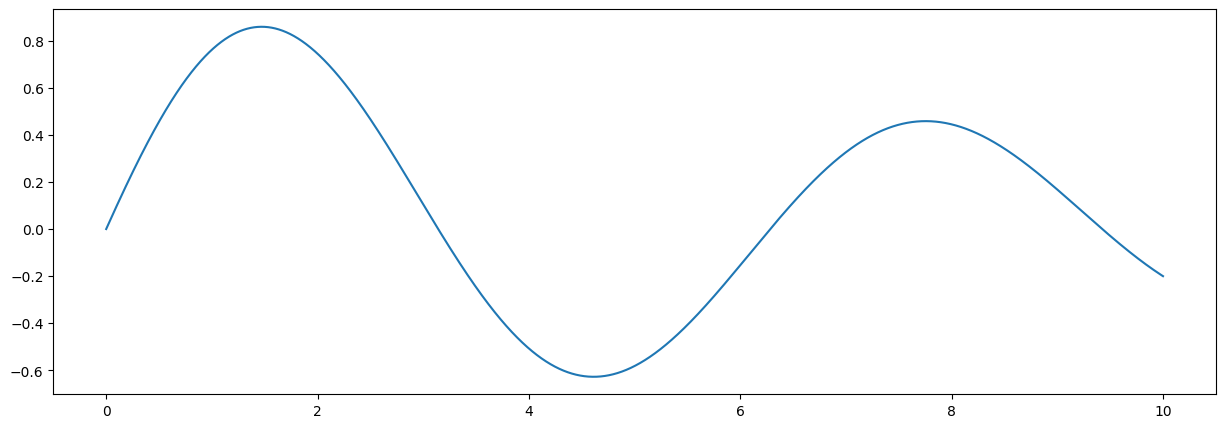

In [45]:
start,end=0,10
number_of_points = 10000

draw_my_function(f,start,end,number_of_points)


    


## Question 2)

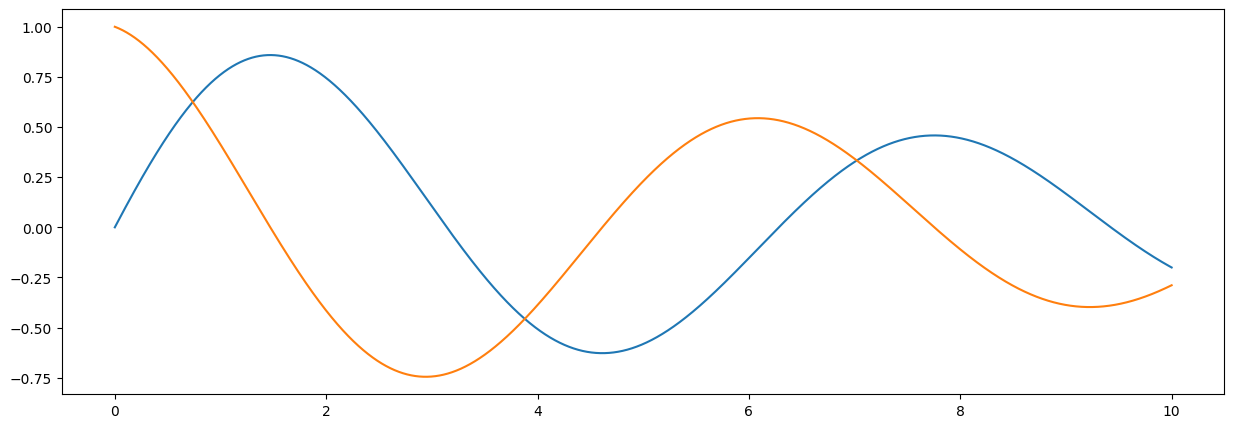

In [46]:
start,end=0,10
number_of_points = 10000

draw_my_function_with_gradient(f,start,end,number_of_points)

## Question 3)

La moyenne de la fonction f(x) est   : -0.27970212657937343
La variance de la fonction f(x) est   : 0.08298828165357051
L'écart type de la fonction f(x) est : 0.28807686761274415


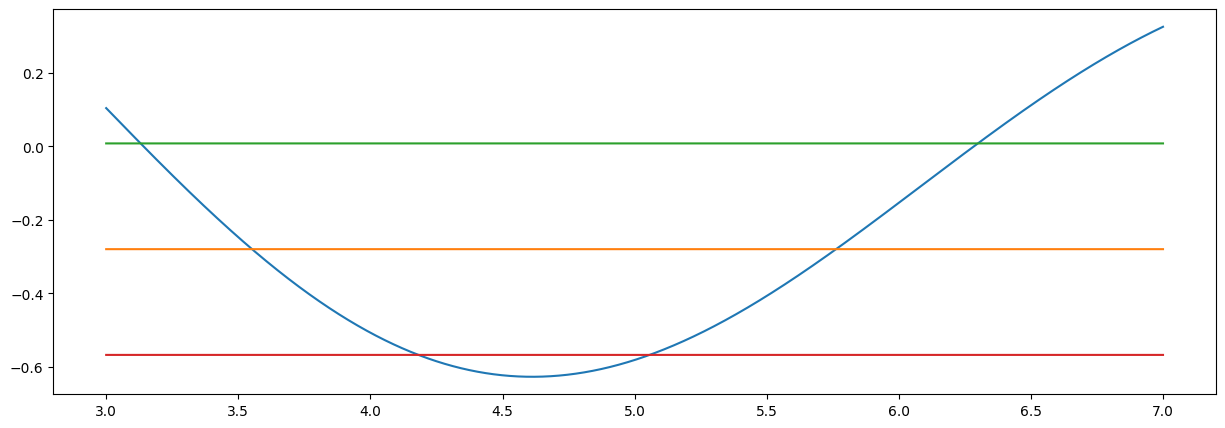

In [83]:
start,end=3,7
number_of_points = 10000
steps = (end-start)/number_of_points
variance = 0

x_values = []
y_values = []

for index_step in range (0,number_of_points):
    x_values.append(start+index_step*steps)
    y_values.append(f(start+index_step*steps))

# calcul de la moyenne et de sa droite
mean = sum(y_values)/number_of_points
ligne_mean = [mean]*number_of_points

# calcul de la variance
for i in range(0,number_of_points):
    variance = variance + (y_values[i]-mean)**2
variance = variance/number_of_points

# calcul de l'ecart type et de ses droites
ecart_type = math.sqrt(variance)
ecart_type_top = [mean + ecart_type]*number_of_points
ecart_type_bot = [mean - ecart_type]*number_of_points

print("La moyenne de la fonction f(x) est   :",mean)
print("La variance de la fonction f(x) est   :",variance)
print("L'écart type de la fonction f(x) est :",ecart_type)

plt.figure(figsize=(15,5)) 
plt.plot(x_values,y_values)
plt.plot(x_values,ligne_mean)
plt.plot(x_values,ecart_type_top)
plt.plot(x_values,ecart_type_bot)
plt.show()